In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from os import listdir
import scipy

In [2]:
sns.set_context('talk')

In [3]:
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

# Dumbbell neck curvatures

In [4]:
cd O:\TUD\__eDICE-paper\__for-paper\data_publication\dumbbell-neck-curvatures

O:\TUD\__eDICE-paper\__for-paper\data_publication\dumbbell-neck-curvatures


In [5]:
# find files with actin dumbbell neck profiles (data extracted from images using Fiji plugin Kappa)
thefilepath = r'O:\TUD\__eDICE-paper\__for-paper\data_publication\dumbbell-neck-curvatures'
files_csv = find_csv_filenames( thefilepath )

df = pd.DataFrame()
for file in files_csv:
    tempdf = pd.read_csv(file) 
    tempdf['file']=file
    df = pd.concat([df, tempdf])
    
df['curvature signed (um-1)'] = df['Point Curvature (um-1)']*df['Point Curvature Sign']

df.head(3)

,Curve Name,Curve Length (um),Average Curvature (um-1),Curvature Std (um-1),X-Coordinate (um),Y-Coordinate (um),Point Curvature (um-1),Point Curvature Sign,Red Intensity,Green Intensity,Blue Intensity,file,curvature signed (um-1)
0,CURVE 142,3.142104,0.607976,0.589562,3.337143,4.708571,0.013168,-1,0.0,4.0,3.0,20220114_run1_ArpB5L-5uMVCA-8uMactin_R4-1_side...,-0.013168
1,CURVE 142,3.142104,0.607976,0.589562,3.351003,4.695781,0.014013,-1,0.0,4.0,3.0,20220114_run1_ArpB5L-5uMVCA-8uMactin_R4-1_side...,-0.014013
2,CURVE 142,3.142104,0.607976,0.589562,3.364725,4.683124,0.014894,-1,1.0,6.0,2.0,20220114_run1_ArpB5L-5uMVCA-8uMactin_R4-1_side...,-0.014894


94


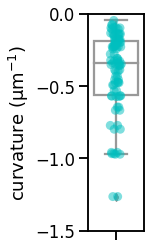

In [6]:
# data to plot: minimum curvature (= most negative curvature) for each trace of a neck outline
df_mins = df.groupby('file').min().reset_index()

f = plt.figure(figsize=[1, 4])

ax = sns.stripplot(data=df_mins, y='curvature signed (um-1)', color='c', s=9, alpha=0.5)
sns.boxplot(data=df_mins, y='curvature signed (um-1)',color='w')

ax.set_ylim(-1.501, 0)
ax.set_ylabel('curvature ($\mathregular{\mu m^{-1}}$)')

print(len(df_mins))

fig = ax.get_figure()
fig.savefig('neck-curvatures.png', dpi=300, bbox_inches='tight')

In [7]:
# mean curvature at neck apex
df_mins.mean()['curvature signed (um-1)']

-0.4338763009397228

In [8]:
df_neck_mins = df_mins

# Concave patch curvatures

In [9]:
cd O:\TUD\__eDICE-paper\__for-paper\data_publication\concave-patch-curvatures

O:\TUD\__eDICE-paper\__for-paper\data_publication\concave-patch-curvatures


In [10]:
# find files with actin dumbbell neck profiles (data extracted from images using Fiji plugin Kappa)
thefilepath = r'O:\TUD\__eDICE-paper\__for-paper\data_publication\concave-patch-curvatures'
files_csv = find_csv_filenames( thefilepath )

df = pd.DataFrame()
for file in files_csv:
    tempdf = pd.read_csv(file) 
    tempdf['file']=file
    df = pd.concat([df, tempdf])
    
df['curvature signed (um-1)'] = df['Point Curvature (um-1)']*df['Point Curvature Sign']

df.head(3)

,Curve Name,Curve Length (um),Average Curvature (um-1),Curvature Std (um-1),X-Coordinate (um),Y-Coordinate (um),Point Curvature (um-1),Point Curvature Sign,Red Intensity,Green Intensity,Blue Intensity,file,curvature signed (um-1)
0,CURVE 25,8.18314,0.34448,0.2998,4.106667,9.333333,0.024834,-1,443.0,147.0,317.0,20211112_run1_8uMactin_1uLCaP_00117-1_z13__z11...,-0.024834
1,CURVE 25,8.18314,0.34448,0.2998,4.119118,9.307210,0.025637,-1,443.0,147.0,317.0,20211112_run1_8uMactin_1uLCaP_00117-1_z13__z11...,-0.025637
2,CURVE 25,8.18314,0.34448,0.2998,4.131473,9.281339,0.026465,-1,443.0,147.0,317.0,20211112_run1_8uMactin_1uLCaP_00117-1_z13__z11...,-0.026465


37


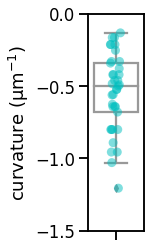

In [11]:
# data to plot: minimum curvature (= most negative curvature) for each trace of a neck outline
df_mins = df.groupby('file').min().reset_index()

f = plt.figure(figsize=[1, 4])

ax = sns.stripplot(data=df_mins, y='curvature signed (um-1)', color='c', s=9, alpha=0.5)
sns.boxplot(data=df_mins, y='curvature signed (um-1)',color='w')

ax.set_ylim(-1.501, 0)
ax.set_ylabel('curvature ($\mathregular{\mu m^{-1}}$)')

print(len(df_mins))

fig = ax.get_figure()
fig.savefig('patch-curvatures.png', dpi=300, bbox_inches='tight')

In [12]:
df_patch_mins = df_mins

# Comparing neck and patch curvatures

In [13]:
df_patch_mins['loc']='patch'
df_neck_mins['loc']='neck'
df_both = pd.concat([df_patch_mins, df_neck_mins])

37


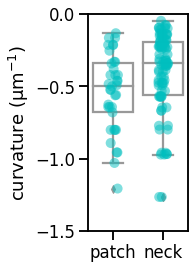

In [14]:
f = plt.figure(figsize=[1.8, 4])
ax = sns.stripplot(data=df_both, x='loc', y='curvature signed (um-1)',color='c', s=10, alpha=0.5)
sns.boxplot(data=df_both, x='loc', y='curvature signed (um-1)',color='w')

ax.set_ylim(-1.501, 0)
ax.set_ylabel('curvature ($\mathregular{\mu m^{-1}}$)')
ax.set_xlabel('')

print(len(df_mins))

fig = ax.get_figure()
fig.savefig('both-curvatures.png', dpi=300, bbox_inches='tight')

Welch's t-test

In [15]:
scipy.stats.ttest_ind(df_patch_mins['curvature signed (um-1)'], df_neck_mins['curvature signed (um-1)'], equal_var=False)

Ttest_indResult(statistic=-1.85545417606153, pvalue=0.06671051190957637)